<a href="https://colab.research.google.com/github/sugiyama404/DecideBudgetFromWalras/blob/main/Estimated_Money_multiplier/Estimated_Money_multiplier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
drive.mount('/content/drive/')
nov_dir = 'Colab Notebooks/dataset/walras_equation/'
exp_dir = 'Colab Notebooks/workspace/export/'
mbase_path = '/content/drive/My Drive/' + nov_dir + 'mblong.xlsx'
mstock_path = '/content/drive/My Drive/' + nov_dir + 'money_stock.csv'
save_path = '/content/drive/My Drive/' + exp_dir + 'Estimated_Money_multiplier.png'
excel_sheet_name='平残（Average amounts outstanding）'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# マネタリーベース

In [3]:
df = pd.read_excel(mbase_path, sheet_name=excel_sheet_name)
df = df.drop(range(6))
df = pd.concat([df['Unnamed: 1'], df['Unnamed: 7']], axis=1)
df = df.rename(columns={'Unnamed: 1': 'DATE', 'Unnamed: 7': 'MONETTALYBASE'})
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df = df.reset_index(drop=True)
drop_index = df.index[(df.index >= 612)]
df = df.drop(drop_index)
drop_index = df.index[(df.index <= 551)]
df = df.drop(drop_index)
df = df.set_index('DATE')
df.index = df.index.strftime('%Y/%m')
df.tail()

,MONETTALYBASE
DATE,
2020/08,5686470
2020/09,5818226
2020/10,5939036
2020/11,6000438
2020/12,6100952


# マネーストック

In [4]:
df2 = pd.read_csv(mstock_path,encoding='cp932')
df2 = df2[df2.index != 0]
df2 = df2.rename(columns={'データコード': 'DATE','MD02\'MAM1NAM2M2MO': 'MONEYSTOCK'})
df2 = df2.drop(['MD02\'MAM1NAM3CCMO','MD02\'MAM1NAM3DMMO'], axis=1)
df2 = df2.reset_index(drop=True)
drop_index = df2.index[(df2.index >= 60)]
df2 = df2.drop(drop_index)
df2 = df2.set_index('DATE')
df2.tail()

,MONEYSTOCK
DATE,
2020/08,11178523
2020/09,11229627
2020/10,11242372
2020/11,11315657
2020/12,11369091


# 信用乗数

In [5]:
df3 = pd.concat([df['MONETTALYBASE'], df2['MONEYSTOCK']], axis=1)
df3['MONEYSTOCK'] = df3['MONEYSTOCK'].astype(int)
df3['MoneyMultiplier'] = df3['MONEYSTOCK']/df3['MONETTALYBASE']
df3 = df3.drop(['MONEYSTOCK','MONETTALYBASE'], axis=1)
serial_num = pd.RangeIndex(start=1, stop=len(df.index) + 1, step=1)
df3['No'] = serial_num
df3.tail()

,MoneyMultiplier,No
DATE,,
2020/08,1.96581,56
2020/09,1.93008,57
2020/10,1.89296,58
2020/11,1.88581,59
2020/12,1.86349,60


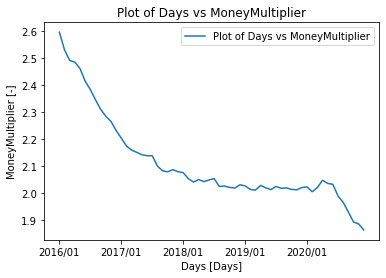

In [6]:
plt.plot(df3.index,df3['MoneyMultiplier'], label="Plot of Days vs MoneyMultiplier")

plt.title('Plot of Days vs MoneyMultiplier')
plt.ylabel('MoneyMultiplier [-]')
plt.xlabel('Days [Days]')
plt.xticks(['2016/01','2017/01', '2018/01','2019/01', '2020/01'])
plt.legend()
plt.show()

In [7]:
model = LinearRegression()

X = df3[['No']].values
Y = df3['MoneyMultiplier'].values

model.fit(X, Y)
a=model.coef_[0]
b=model.intercept_
r2=model.score(X,Y)
print('coefficient = ', model.coef_[0])
print('intercept = ', model.intercept_)

coefficient =  -0.008187783320053916
intercept =  2.3618821612964167


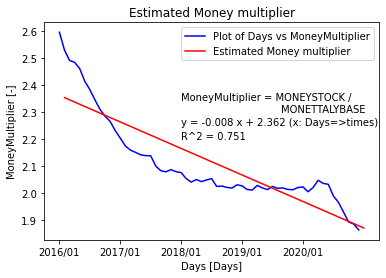

In [8]:
fig = plt.figure()

plt.plot(df3.index,df3['MoneyMultiplier'], color = 'blue', label="Plot of Days vs MoneyMultiplier")
plt.plot(X, model.predict(X), color = 'red', label="Estimated Money multiplier")

plt.title('Estimated Money multiplier')
plt.ylabel('MoneyMultiplier [-]')
plt.xlabel('Days [Days]')
plt.xticks(['2016/01','2017/01', '2018/01','2019/01', '2020/01'])

plt.text(24, 2.3, 'MoneyMultiplier = MONEYSTOCK / \n                                MONETTALYBASE')
plt.text(24, 2.25, 'y = %s x + %s (x: Days=>times)' % (round(a,3),round(b,3)))
plt.text(24, 2.2, 'R^2 = %s' % round(r2,3))
plt.legend()
fig.savefig(save_path)
plt.show()